In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
df = pd.read_csv('dataset_para_modelar.csv')

C:\Users\O002091\AppData\Local\Temp\ipykernel_22296\2600175016.py:1: DtypeWarning: Columns (5,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset_para_modelar.csv')


In [113]:
df = df.drop('Unnamed: 0', axis=1)

In [114]:
df.head()

,cod_persona,mes,pais,sexo,edad,fecha1,xti_empleado,xti_nuevo_cliente,num_antiguedad,xti_rel,...,ind_prod16,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24,ind_prod25
0,178103,2015-01-28,ES,H,35,2015-01-12,N,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,0
1,503082,2015-01-28,ES,V,27,2012-08-10,N,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,0
2,502996,2015-01-28,ES,V,37,2012-08-10,N,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,0
3,503053,2015-01-28,ES,H,23,2012-08-10,N,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,1,0
4,503031,2015-01-28,ES,H,44,2012-08-10,N,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,0


In [115]:
def calculate_sign_product(df, product, sign_product):
    # Sort the DataFrame by person_id and month
    df = df.sort_values(by=['cod_persona', 'mes']).reset_index(drop=True)

    # Create a new column "sign_product" initialized with 0
    df[sign_product] = 0

    # Iterate over the rows of the DataFrame
    for i in range(1, len(df)):
        # Check if the current month's product is 0 and the next month's product is 1
        if df.loc[i-1, product] == 0 and df.loc[i, product] == 1 and df.loc[i-1, 'cod_persona'] == df.loc[i, 'cod_persona']:
            df.loc[i-1, sign_product] = 1

    return df

In [116]:
prods = df.columns.tolist()[-25:]
sign_prods = ['sign_prod' + str(i) for i in range(1,26)]

In [117]:
for i in range(len(prods)):
    df = calculate_sign_product(df,prods[i],sign_prods[i])

In [205]:
def cat_biv_plot(df, target_col, categorical_col):
    # Filter the DataFrame based on the target variable values
    target_0 = df[df[target_col] == 0]
    target_1 = df[df[target_col] == 1]

    # Plot the bivariate relationship using a bar plot
    sns.countplot(x=categorical_col, hue=target_col, data=df)

    # Set labels and title
    plt.xlabel(categorical_col)
    plt.ylabel('Count')
    plt.title(f'Bivariate Plot: {target_col} vs {categorical_col}')

    # Add legend
    plt.legend(title=target_col)

    # Show the plot
    plt.show()


In [203]:
def num_biv_plot(df, target_col, numeric_col):
    # Filter the DataFrame for each target category
    target_0 = df[df[target_col] == 0]
    target_1 = df[df[target_col] == 1]

    # Plot kernel density estimation for target 0 and target 1
    sns.kdeplot(target_0[numeric_col], color='blue', label='Target 0', bw_adjust=0.05)
    sns.kdeplot(target_1[numeric_col], color='green', label='Target 1', bw_adjust=0.05)

    # Set labels and title
    plt.xlabel(numeric_col)
    plt.ylabel('Density')
    plt.title(f'Bivariate Plot: {target_col} vs {numeric_col}')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()


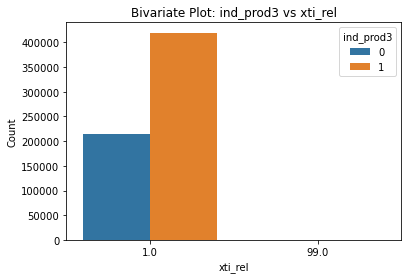

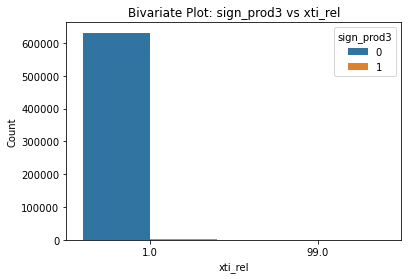

In [209]:
cat_biv_plot(df, 'ind_prod3', 'xti_rel')
cat_biv_plot(df, 'sign_prod3', 'xti_rel')

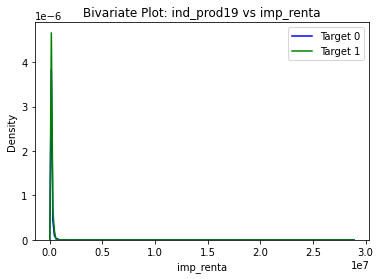

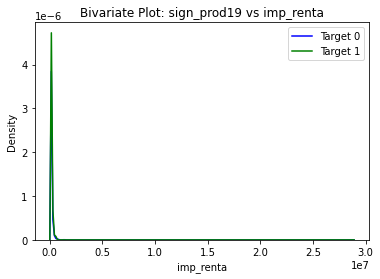

In [207]:
num_biv_plot(df, 'ind_prod19', 'imp_renta')
num_biv_plot(df, 'sign_prod19', 'imp_renta')

In [175]:
count_prods = [df[prod].value_counts() for prod in prods]
count_signprods = [df[prod].value_counts() for prod in sign_prods]
# Create a new DataFrame to store the value counts
count_prods_df = pd.DataFrame({prods[i]: [count_prods[i].get(0, 0), count_prods[i].get(1, 0)] for i in range(len(prods))},
                             index=[0, 1])
count_signprods_df = pd.DataFrame({sign_prods[i]: [count_signprods[i].get(0, 0), count_signprods[i].get(1, 0)] for i in range(len(sign_prods))},
                             index=[0, 1])

In [183]:
count_prods_df

,ind_prod1,ind_prod2,ind_prod3,ind_prod4,ind_prod5,ind_prod6,ind_prod7,ind_prod8,ind_prod9,ind_prod10,...,ind_prod16,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24,ind_prod25
0,634618,634682,215192,634368,582803,628340,628446,550962,607071,633390,...,628803,632957,600678,605801,617861,632298,599389,596385,552918,592872
1,64,0,419490,314,51879,6342,6236,83720,27611,1292,...,5879,1725,34004,28881,16821,2384,35262,38266,81764,41810


In [181]:
count_signprods_df

,sign_prod1,sign_prod2,sign_prod3,sign_prod4,sign_prod5,sign_prod6,sign_prod7,sign_prod8,sign_prod9,sign_prod10,...,sign_prod16,sign_prod17,sign_prod18,sign_prod19,sign_prod20,sign_prod21,sign_prod22,sign_prod23,sign_prod24,sign_prod25
0,634682,634682,631364,634675,632923,634661,634332,634501,634594,634528,...,634653,634676,634258,631393,634466,634677,631257,630669,627718,631656
1,0,0,3318,7,1759,21,350,181,88,154,...,29,6,424,3289,216,5,3425,4013,6964,3026


In [176]:
{prod:len(prods) for prod in prods}

{'ind_prod1': 25,
 'ind_prod2': 25,
 'ind_prod3': 25,
 'ind_prod4': 25,
 'ind_prod5': 25,
 'ind_prod6': 25,
 'ind_prod7': 25,
 'ind_prod8': 25,
 'ind_prod9': 25,
 'ind_prod10': 25,
 'ind_prod11': 25,
 'ind_prod12': 25,
 'ind_prod13': 25,
 'ind_prod14': 25,
 'ind_prod15': 25,
 'ind_prod16': 25,
 'ind_prod17': 25,
 'ind_prod18': 25,
 'ind_prod19': 25,
 'ind_prod20': 25,
 'ind_prod21': 25,
 'ind_prod22': 25,
 'ind_prod23': 25,
 'ind_prod24': 25,
 'ind_prod25': 25}